# Image filtering
Goal: Perform linear and non linear filtering of an image

In [60]:
# Uncomment this if scikit-image is not available
#!pip install scikit-image

# Clone the repository. Uncomment this line if it you want to get a local copy of the repository.
# !git clone https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

# Pull updates from the git repository. Uncomment this line if you already have cloned the repository and you want to update it. In this case, this file should belong to the repository.
# !git pull https://gricad-gitlab.univ-grenoble-alpes.fr/dallamum/IIP.git

## Setup

In [61]:
# Load libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage import color as col
from skimage.exposure import rescale_intensity
from skimage import filters
from skimage.filters import gaussian

from scipy import ndimage
from scipy.ndimage import convolve as conv
from scipy.ndimage import correlate as corr


## Convolution and correlation
Compare the effect of a convolution and correlation.

We will use the implementation of the two operators provided by `scipy`.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.correlate.html

In [63]:
# Example of convolution 

# Create a synthetic image
a = np.array([[1, 2, 0, 0],
              [5, 3, 0, 4],
              [0, 0, 0, 7],
              [9, 3, 0, 0]])
print(a)

# Mask
k = np.array([[1,1,1],[1,1,0],[1,0,0]])
k = k/k.sum()
print(k)

# Compute convolution, using zero padding
b = conv(a, k, mode='constant', cval=0.0)

print(b)

[[1 2 0 0]
 [5 3 0 4]
 [0 0 0 7]
 [9 3 0 0]]
[[0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.        ]
 [0.16666667 0.         0.        ]]
[[1 1 1 0]
 [1 0 1 1]
 [2 2 2 1]
 [2 0 1 0]]


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 9 8 7 0 0]
 [0 0 6 5 4 0 0]
 [0 0 3 2 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


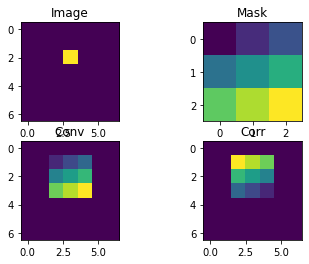

In [20]:
# Compare convolution and correlation

# Create an image of zeros with just a single one (like a dirac)
a = np.zeros([7,7], dtype=np.uint8)
a[2,3] = 1
print(a)

# Filter mask
k = np.array([[1,2,3],[4,5,6],[7,8,9]])

g_cv = conv(a, k, mode='constant', cval=0.0)
g_cr = corr(a, k, mode='constant', cval=0.0)
print(g_cv)
print(g_cr)


plt.figure()
plt.subplot(221)
plt.title('Image')
plt.imshow(a)
plt.subplot(222)
plt.title('Mask')
plt.imshow(k)
plt.subplot(223)
plt.title('Conv')
plt.imshow(g_cv)
plt.subplot(224)
plt.title('Corr')
plt.imshow(g_cr)


[[  0   9  26  50  38  21   0]
 [  0  42  94 154 106  54   0]
 [  0  90 186  29 186  90   0]
 [  0  54 106 154  94  42   0]
 [  0  21  38  50  26   9   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
[[  0  81 144 190 112  49   0]
 [  0 108 186 236 134  56   0]
 [  0  90 144 165  84  30   0]
 [  0  36  54  56  26   8   0]
 [  0   9  12  10   4   1   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


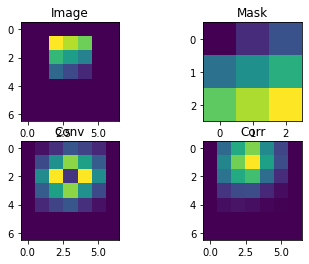

In [21]:
# Convolution and correlation for template matching

# Use as image the result of correlation in the previous run so the mask is present in the image
a = g_cr

g_cv = conv(a, k, mode='constant', cval=0.0)
g_cr = corr(a, k, mode='constant', cval=0.0)

print(g_cv)
print(g_cr)


plt.figure()
plt.subplot(221)
plt.title('Image')
plt.imshow(a)
plt.subplot(222)
plt.title('Mask')
plt.imshow(k)
plt.subplot(223)
plt.title('Conv')
plt.imshow(g_cv)
plt.subplot(224)
plt.title('Corr')
plt.imshow(g_cr)


## Image denoising

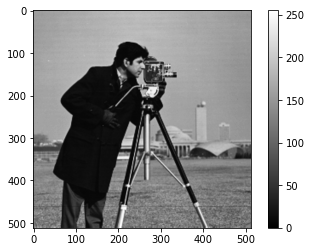

Text(0, 0.5, '# of occurence')

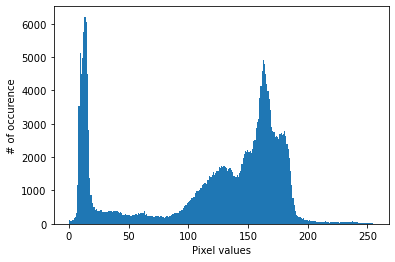

In [64]:
# Load an image
f = data.camera()
plt.imshow(f, cmap='gray')
plt.colorbar()
plt.show()

# Histogram
plt.figure()
# Flatten the image: a matrix is converted in a vector
plt.hist(f.flatten(), bins=256)
plt.xlabel('Pixel values')
plt.ylabel('# of occurence')

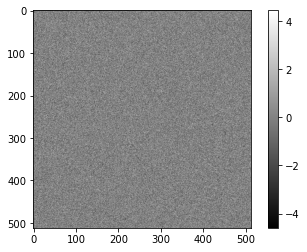

Text(0, 0.5, '# of occurence')

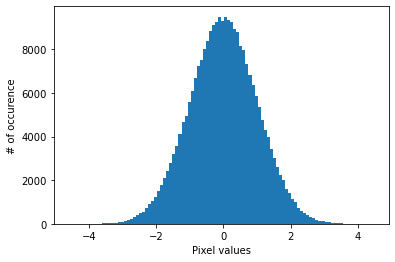

In [8]:
# Create a noisy image
sigma = 20
noise = np.random.normal(size=f.shape)

# Show the image of only noise
plt.figure()
plt.imshow(noise, cmap='gray')
plt.colorbar()
plt.show()

# Histogram
plt.figure()
# Flatten the image: a matrix is converted in a vector
plt.hist(noise.flatten(), bins=100)
plt.xlabel('Pixel values')
plt.ylabel('# of occurence')


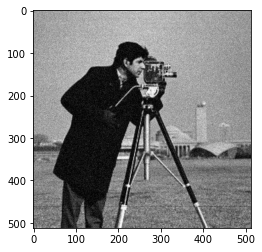

Text(0, 0.5, '# of occurence')

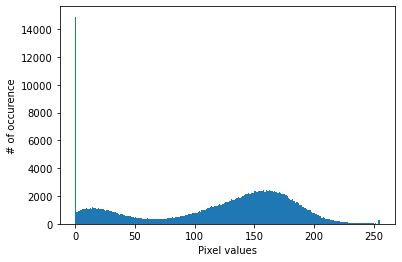

In [28]:
# Add noise to the image
fn = f + sigma * noise

# Convert back to uint8 data range
fn = rescale_intensity(fn, in_range=(0, 255), out_range=np.uint8)

plt.imshow(fn, cmap='gray')
plt.show()

# Histogram
plt.figure()
# Flatten the image: a matrix is converted in a vector
plt.hist(fn.flatten(), bins=256)
plt.xlabel('Pixel values')
plt.ylabel('# of occurence')

In [29]:
# Compute Mean Squared Error between the original image and the noisy one
mse_noise = mean_squared_error(f, fn)
print(mse_noise)

369.057861328125


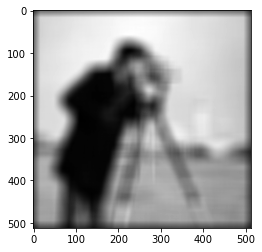

In [69]:
# Perform a convolution

# Size of the filter
k_size = 35

# Define a kernel for performing an average
k = np.ones((k_size,k_size))
k = k/k.sum()

# print(k)

# Apply the filter
g = conv(fn, k, mode='constant', cval=0.0)

plt.imshow(g, cmap='gray')
plt.show()


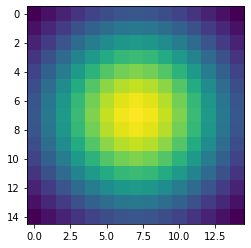

In [75]:
# Generate a Gaussian kernel
sig = 5

a = np.zeros((15, 15))
a[np.floor(a.shape[0]/2).astype(np.uint8), np.floor(a.shape[1]/2).astype(np.uint8)] = 1

k = gaussian(a, sigma=sig)

# print(k)

plt.figure()
plt.imshow(k)

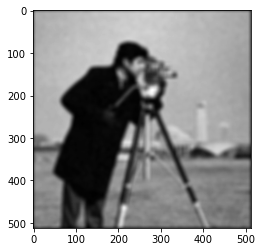

In [76]:
g = conv(fn, k, mode='constant', cval=0.0)

plt.imshow(g, cmap='gray')
plt.show()

### Tests
- Change the level of noise
- Change the size of the kernels
- Change how the image borders are handled (see the input option of `convolve` for example use: ‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’)
- Use the same procedure used for the gaussian kernel for defining other filter masks and apply them to an image. For example `prewitt`, `sobel`, `laplace`. 
  - See https://scikit-image.org/docs/dev/api/skimage.filters.html
  - Import the filter as `from skimage.filters import <name_of_the_filter>`